In [1]:
import pandas as pd # Librería para análisis de datos
import numpy as np # Librería para análisis numérico
import matplotlib.pyplot as plt # Librería para visualización


plt.style.use('seaborn-white') # Para configurar un estilo de gráfico

%matplotlib inline 


## Generar y visualizar datos

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

X, y = datasets.make_regression(n_samples=300, noise=0.9, n_features=2, n_informative=2, random_state=1)

z_scores_Y = (y - y.mean()) * np.random.random(len(y)) / y.std() 

X_df = pd.DataFrame(X, columns = ['x1', 'x2'])
y_df = pd.DataFrame(z_scores_Y, columns = ['y'])

df = pd.concat([X_df, y_df], axis=1)

df.head(10)

,x1,x2,y
0,0.240737,0.562761,0.269228
1,-1.164008,0.169869,-0.081820
2,-1.627438,0.659050,0.087142
3,1.000881,-0.851456,-0.347985
4,0.931102,0.838983,0.589766
5,-0.629442,0.780027,0.221086
6,-1.510456,-0.177632,-0.371201
7,1.107175,0.181039,0.000671
8,-0.184176,0.617986,0.027917
9,0.323527,-0.442229,-0.376114


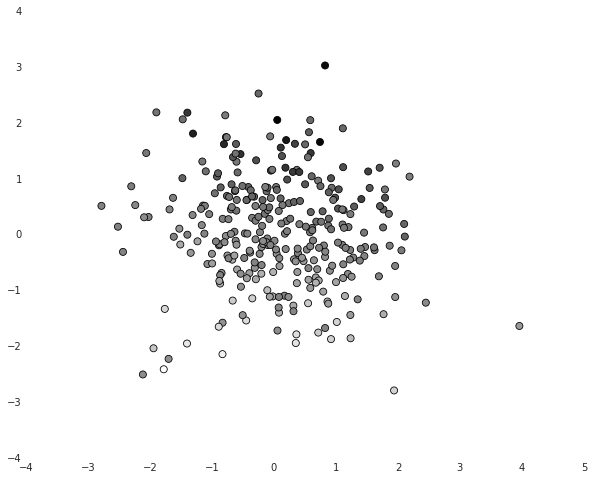

In [21]:
plt.figure(figsize=(10,8))
plt.rc('axes',edgecolor='w')
plt.scatter(X[:,0], X[:, 1], c=z_scores_Y, s=50,
           cmap="Greys", edgecolor="k", linewidth=.8)
plt.show()

## Machine Learning

In [47]:
# FUNCIONES

def ajuste_pred(algoritmo, x, y):
    """
    + input:
        - algoritmo
        - x: matriz de atributos
        - y: vector de clases
        
    + output:
        - reg ajustado
        - df_tr: pandas DataFrame (objeto) con datos del conjunto de entrenamiento
        - df_test: pandas DataFrame (objeto) con datos del conjunto de test
    
    """
    
    x_tr, x_test, y_tr, y_test = train_test_split(X, y,
                                                  test_size=.30,
                                                  random_state=2)
    

    reg = algoritmo.fit(x_tr, y_tr)
    yPred = reg.predict(x_test)
    
    df_tr = pd.DataFrame({
            'x1':x_tr[:,0],
            'x2':x_tr[:,1],
            'y_real': y_tr,
        })
    
    df_test = pd.DataFrame({ 
            'x1':x_test[:,0],
            'x2':x_test[:,1],
            'y_real': y_test,
            'yPred': yPred
        })
    
    return reg, df_tr, df_test


def plot_boundaries(reg, df_tr, df_test, color='Reds'):
    
    """
    + input:
        - reg
        - df_tr: pandas DataFrame (objeto) con datos del conjunto de entrenamiento
        - df_test: pandas DataFrame (objeto) con datos del conjunto de test
        - color: mapa de colores (default: Reds)
     
    """
    
    xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    probs = reg.predict(grid).reshape(xx.shape)
    
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1)
    plt.contourf(xx, yy, probs, 100, cmap=color)
    
    #plot_train = plt.scatter(df_tr['x1'], df_tr['x2'], c=df_tr['y_real'], s=40,
    #           cmap=color, edgecolor="k", linewidth=.8, alpha=.3)
    plot_test = plt.scatter(df_test['x1'], df_test['x2'], c=df_test['y_real'], s=60,
           cmap=color, edgecolor="k", linewidth=.8)
    plt.title('Frontera de decisión')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    plt.subplot(1, 3, 2)
    plt.scatter(df_test['y_real'], df_test['yPred'], c = abs(df_test['y_real'] - df_test['yPred']), 
                cmap=color+'_r', s=60, edgecolor="k")
    plt.plot(df_test['y_real'], df_test['y_real'], 'black', linewidth=.5)
    plt.title('Valores reales vs. predicción')
    
    plt.subplot(1, 3, 3)
    plt.hist(df_test['y_real'] - df_test['yPred'], color=color.lower()[:-1], alpha=0.4, bins=20)
    plt.title('Historama de residuales')
    
    plt.show()

    
def metricas(df_test):
    
    """
    + input:
        - df_test: pandas DataFrame (objeto) con datos del conjunto de test
        
    + output:
        - mse: error cuadrático medio
        - r2: r cuadrado
    
    """
    
    mse = metrics.mean_squared_error(df_test['y_real'], df_test['yPred'])
    r2 = metrics.r2_score(df_test['y_real'], df_test['yPred'])
    
    print("Error cuadrático medio:\n{0:.2f}\n\nr2:\n{1:.2f}".format(mse,r2))
    
    return mse, r2

In [23]:
from sklearn import linear_model, tree, ensemble, svm

lin_reg = linear_model.LinearRegression()
svr = svm.SVR(C=1.0, epsilon=0.2)
dec_tree = tree.DecisionTreeRegressor(max_depth=5)
rand_forest = ensemble.RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1)
boost = ensemble.GradientBoostingRegressor(max_depth=5, n_estimators=10, max_features=1)

### Linear regression

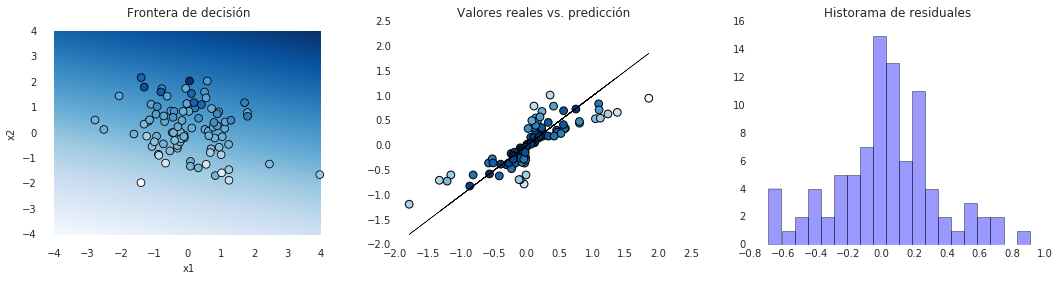

Error cuadrático medio:
0.10

r2:
0.68


,x1,x2,yPred,y_real
0,-0.731531,-0.424493,-0.353198,-0.032896
1,-1.175983,0.461164,0.025760,0.002240
2,0.513505,0.142251,0.075801,0.114428
3,0.119009,0.198300,0.055109,0.058202
4,-0.468674,0.021863,-0.102843,-0.071512


In [48]:
clf_lr, df_lr_tr, df_lr_test = ajuste_pred(lin_reg, X, z_scores_Y)
plot_boundaries(clf_lr, df_lr_tr, df_lr_test, "Blues")
metricas(df_lr_test)

df_lr_test.head(5)

### SVR

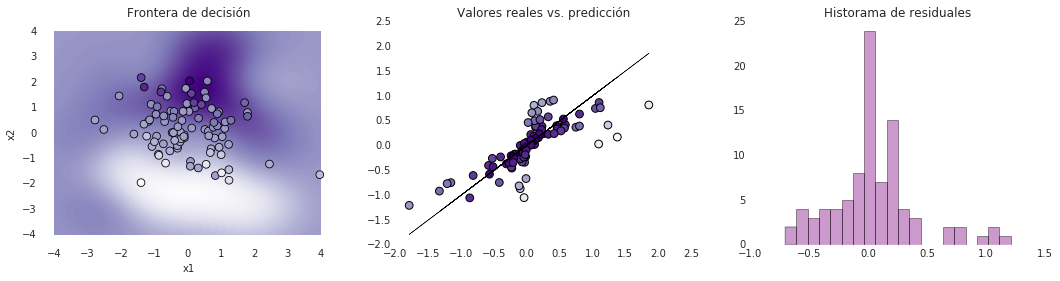

Error cuadrático medio:
0.13

r2:
0.56


,x1,x2,yPred,y_real
0,-0.731531,-0.424493,-0.336558,-0.032896
1,-1.175983,0.461164,0.071802,0.002240
2,0.513505,0.142251,0.039883,0.114428
3,0.119009,0.198300,0.012456,0.058202
4,-0.468674,0.021863,-0.121022,-0.071512


In [49]:
clf_svr, df_svr_tr, df_svr_test = ajuste_pred(svr, X, z_scores_Y)
plot_boundaries(clf_svr, df_svr_tr, df_svr_test, "Purples")
metricas(df_svr_test)

df_svr_test.head(5)

### Decision tree

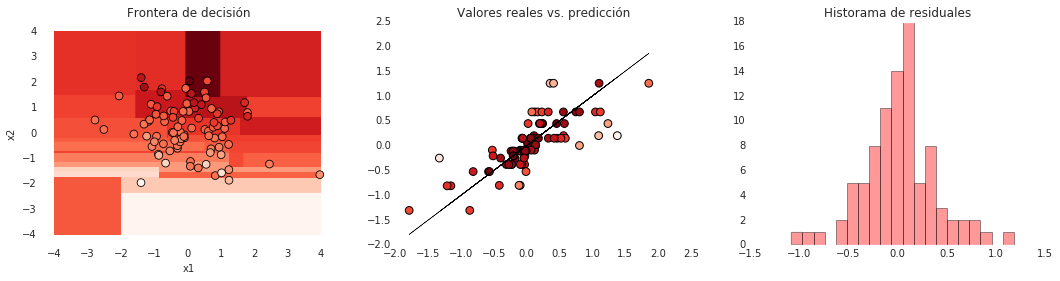

Error cuadrático medio:
0.14

r2:
0.55


,x1,x2,yPred,y_real
0,-0.731531,-0.424493,-0.381022,-0.032896
1,-1.175983,0.461164,-0.091466,0.002240
2,0.513505,0.142251,0.148469,0.114428
3,0.119009,0.198300,0.148469,0.058202
4,-0.468674,0.021863,0.148469,-0.071512


In [50]:
clf_dt, df_dt_tr, df_dt_test = ajuste_pred(dec_tree, X, z_scores_Y)
plot_boundaries(clf_dt, df_dt_tr, df_dt_test, "Reds")
metricas(df_dt_test)

df_dt_test.head(5)

### Random forest

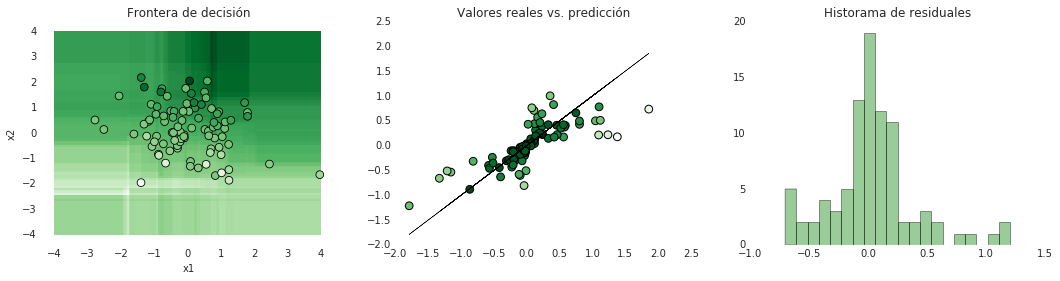

Error cuadrático medio:
0.13

r2:
0.57


,x1,x2,yPred,y_real
0,-0.731531,-0.424493,-0.201974,-0.032896
1,-1.175983,0.461164,0.039333,0.002240
2,0.513505,0.142251,0.114742,0.114428
3,0.119009,0.198300,0.057387,0.058202
4,-0.468674,0.021863,-0.064770,-0.071512


In [51]:
clf_rf, df_rf_tr, df_rf_test = ajuste_pred(rand_forest, X, z_scores_Y)
plot_boundaries(clf_rf, df_rf_tr, df_rf_test, "Greens")
metricas(df_rf_test)

df_rf_test.head(5)

### Gradient boosting

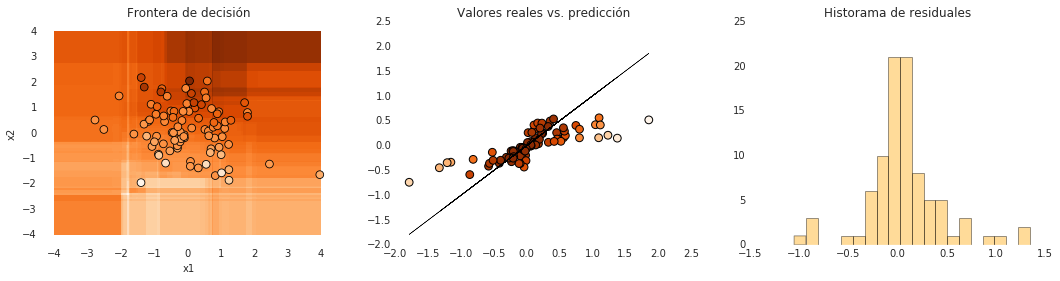

Error cuadrático medio:
0.15

r2:
0.52


,x1,x2,yPred,y_real
0,-0.731531,-0.424493,-0.263389,-0.032896
1,-1.175983,0.461164,-0.005205,0.002240
2,0.513505,0.142251,0.057586,0.114428
3,0.119009,0.198300,-0.010002,0.058202
4,-0.468674,0.021863,-0.053151,-0.071512


In [52]:
clf_gb, df_gb_tr, df_gb_test = ajuste_pred(boost, X, z_scores_Y)
plot_boundaries(clf_gb, df_gb_tr, df_gb_test, "Oranges")
metricas(df_gb_test)

df_gb_test.head(5)